#### 분류 모델

###### - 결정 트리(Decision Tree)

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [8]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

In [9]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

###### - 트리 모델 시각화

In [11]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names,impurity=True, filled=True)

In [10]:
dtc2 = DecisionTreeClassifier(random_state=156, max_depth=3)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

###### - 학습된 모델이 제공되는 정보

In [11]:
dtc.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [12]:
dtc2.feature_importances_

array([0.        , 0.        , 0.55810743, 0.44189257])

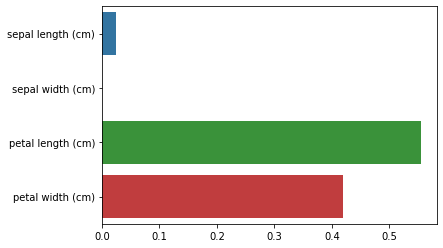

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()

###### - 서포트 벡터 머신(Support Vector Machine)

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [19]:
import pandas as pd
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
# y 값의 분포
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

###### - 표준화(Scaling)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

###### - 모델 학습

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

###### - 모델 평가

In [23]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc.score(X_test, y_test)

0.9912280701754386

In [24]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [25]:
# MNIST 분류
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [26]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [27]:
digits.images.shape

(1797, 8, 8)

In [30]:
digits.data.min(), digits.data.max()

(0.0, 16.0)

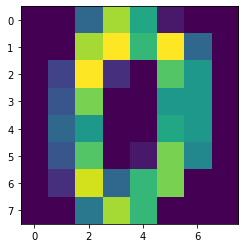

In [31]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0])
plt.show()

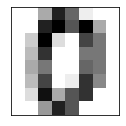

In [33]:
plt.figure(figsize=(2,2))
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
plt.xticks([]), plt.yticks([])
plt.show()


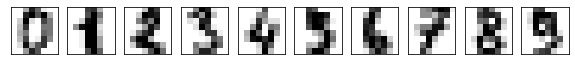

In [38]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.xticks([]), plt.yticks([])
plt.show()


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data/16, digits.target, stratify=digits.target,test_size=0.2, random_state=2022
)

In [40]:
params = {'C':[0.01, 0.1, 1, 10, 100]}

In [41]:
from sklearn.model_selection import GridSearchCV
svc = SVC(random_state=2022)
grid_svc = GridSearchCV(svc, params, scoring='accuracy', cv=5)
grid_svc.fit(X_train,y_train)
grid_svc.best_params_

{'C': 10}

In [42]:
best_svc = grid_svc.best_estimator_
best_svc.score(X_test, y_test)

0.9833333333333333

In [43]:
svc = SVC(C=1, random_state=2022)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9805555555555555

###### - 로지스틱 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# sigmoid 함수
def sigmoid(x, a=1, b=0):
    return (1. / (1+ np.exp(-a * (x - b))))

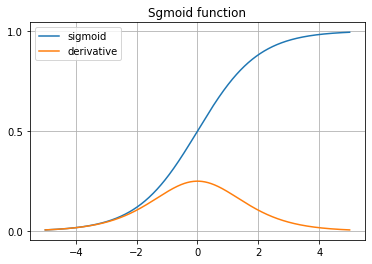

In [11]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, ys*(1-ys), label='derivative')
plt.title('Sgmoid function')
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

# 시그모이드의 미분 최대값: 0.25


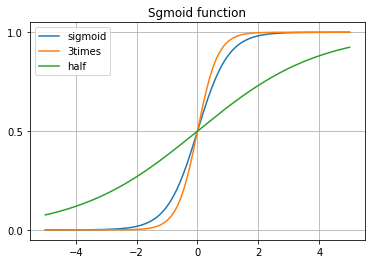

In [10]:
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y3, label='3times')
plt.plot(xs, y_half, label='half')
plt.title('Sgmoid function')
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

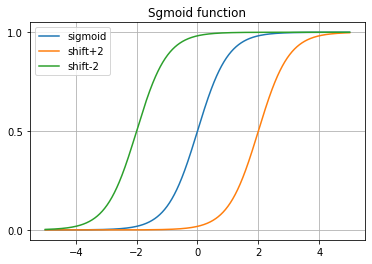

In [9]:
ys = sigmoid(xs, a=2)
y_plus2 = sigmoid(xs, a=2, b=2)
y_minus2 = sigmoid(xs, a=2, b=-2)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y_plus2, label='shift+2')
plt.plot(xs, y_minus2, label='shift-2')
plt.title('Sgmoid function')
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [13]:
# 로지스틱은 정규화/표준화 필수
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

In [16]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train,y_train)


LogisticRegression(random_state=2022)

In [17]:
lrc.coef_

array([[-0.25707259, -0.47053468, -0.26515518, -0.3535659 , -0.11973861,
         0.56573207, -0.85426573, -0.82789531,  0.13441632,  0.07846871,
        -1.26329143,  0.29832367, -0.76599244, -0.99137113, -0.30182972,
         1.05456564,  0.08762138, -0.39327008,  0.51932729,  0.5181576 ,
        -0.99890038, -1.13382048, -0.85983726, -0.97362808, -0.6192331 ,
         0.25215457, -0.82557496, -1.11106798, -0.96614897, -0.44679764]])

In [18]:
lrc.intercept_

array([0.07150263])

In [20]:
# X_test[0]가 1이 될 확률
val = np.dot(lrc.coef_, X_test[0]) + lrc.intercept_
val

array([-20.3489795])

In [21]:
sigmoid(val)

array([1.4539534e-09])

In [22]:
lrc.predict_proba(X_test[:5])

array([[9.99999999e-01, 1.45395340e-09],
       [1.29048390e-02, 9.87095161e-01],
       [9.99988662e-01, 1.13377133e-05],
       [5.23798806e-03, 9.94762012e-01],
       [9.99999953e-01, 4.74465654e-08]])

###### - 다중 분류

In [24]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, test_size=0.2, random_state=2022
)

In [25]:
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train,y_train)
lrc2.predict_proba(X_test[:5])

array([[4.79532022e-03, 3.83358577e-02, 9.56868822e-01],
       [9.99880390e-01, 8.55323123e-05, 3.40776815e-05],
       [9.99381277e-01, 3.51523074e-04, 2.67199670e-04],
       [9.90776514e-01, 8.80287077e-03, 4.20615400e-04],
       [6.64072526e-04, 9.97939259e-01, 1.39666854e-03]])

In [26]:
lrc2.predict(X_test[:5])

array([2, 0, 0, 0, 1])

In [27]:
lrc2.coef_

array([[ 7.55425328e-01,  2.54696045e-01,  4.48868634e-01,
        -8.27794253e-01,  4.43111539e-02,  2.17556029e-01,
         6.47072052e-01, -1.73818031e-01,  1.37444479e-01,
         1.56334022e-01,  1.23537988e-01,  6.75862331e-01,
         1.03739137e+00],
       [-9.31115735e-01, -4.90126341e-01, -8.24554580e-01,
         5.85648798e-01, -9.34024069e-02, -9.82919053e-03,
         3.38293620e-01,  1.74347892e-01,  2.49046242e-01,
        -9.81806450e-01,  6.67121854e-01,  5.15389011e-02,
        -1.11517327e+00],
       [ 1.75690407e-01,  2.35430296e-01,  3.75685946e-01,
         2.42145455e-01,  4.90912530e-02, -2.07726839e-01,
        -9.85365672e-01, -5.29861108e-04, -3.86490722e-01,
         8.25472428e-01, -7.90659841e-01, -7.27401232e-01,
         7.77818948e-02]])

In [28]:
lrc2.intercept_

array([ 0.39626385,  0.66992355, -1.0661874 ])

In [38]:
val2 = np.dot(lrc2.coef_, X_test[0]) + lrc2.intercept_

In [39]:
sigmoid(val2)

array([0.07883682, 0.40624465, 0.94468298])

In [45]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [48]:
# 다중 분류: 소프트맥스 함수 적용
softmax(val2)

array([0.00479532, 0.03833586, 0.95686882])